# Random Forest

As we have discussed, a **Random Forest**  is an ensemble of Decision Trees, generally
trained via the **bagging** method (or sometimes pasting), typically with  max_samples
set to the size of the training set. Instead of building a  BaggingClassifier  and passing it a  DecisionTreeClassifier , you can instead use the  RandomForestClassifier
class, which is more convenient and optimized for Decision Trees.

 The  following  code  trains  a
Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using
all available CPU cores:

In [1]:
import warnings
warnings.filterwarnings('ignore')
# get the dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [3]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.912


In [4]:
rnd_clf

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

The  Random  Forest  algorithm  introduces  extra  randomness  when  growing  trees;
instead of searching for the very best feature when splitting a node, it
searches  for  the  best  feature  among  a  random  subset  of  features.  This  results  in  a
greater  tree  diversity,  which  (once  again)  trades  a  higher  bias  for  a  lower  variance,
generally  yielding  an  overall  better  model.  

*max_features* : int, float, string or None, optional (default=”auto”)

The number of features to consider when looking for the best split:

- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=sqrt(n_features).
- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.


## Boosting
Boosting  (originally  called  hypothesis  boosting)  refers  to  any  Ensemble  method  that
can  combine  several  weak  learners  into  a  strong  learner.  The  general  idea  of  most
boosting methods is to train predictors sequentially, each trying to correct its predecessor. There are many boosting methods available, but by far the most popular are
**AdaBoost **(short for Adaptive Boosting) and Gradient Boosting. 

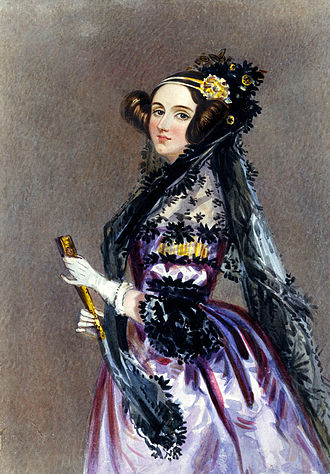
Ada Lovelace, English mathematician and writer. She (conceptually) proposed a mechanical general-purpose computer which supports logic operations and control of flow.

### AdaBoost
One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.
For example, to build an AdaBoost classifier, a first base classifier (such as a Decision
Tree) is trained and used to make predictions on the training set. The relative weight
of  misclassified  training  instances  is  then  increased.  A  second  classifier  is  trained
using the updated weights and again it makes predictions on the training set, weights
are updated, and so on

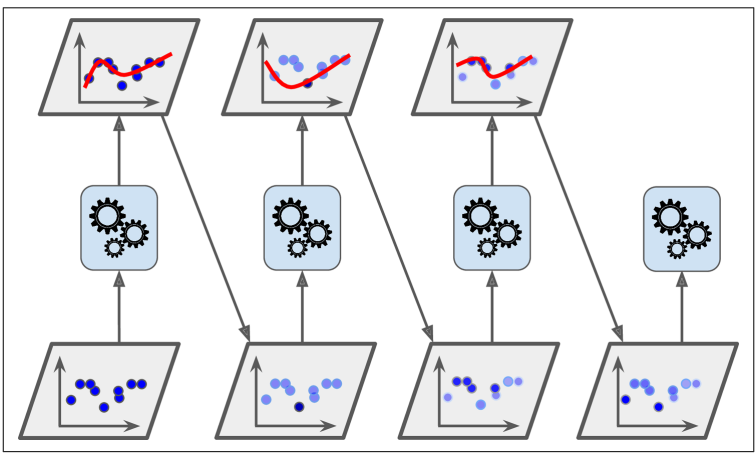

In [5]:
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

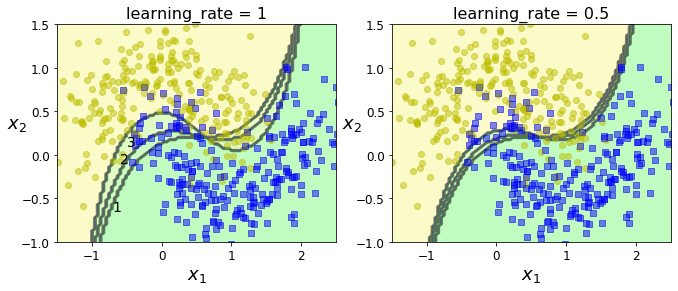

In [8]:
from sklearn.svm import SVC
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    for i in range(3):
        plt.subplot(subplot)
        svm_clf = SVC(kernel="rbf", C=0.05, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

plt.subplot(121)
plt.text(-0.7, -0.65, "1", fontsize=14)
plt.text(-0.6, -0.10, "2", fontsize=14)
plt.text(-0.5,  0.10, "3", fontsize=14)
#save_fig("boosting_plot")
plt.show()

The first classifier gets many instances wrong, so their weights get boosted. The second classifier therefore does a better job on these instances, and
so on. The plot on the right represents the same sequence of predictors except that
the learning rate is halved (i.e., the misclassified instance weights are boosted half as
much at every iteration).

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

In [ ]:
plot_decision_boundary(ada_clf, X, y)

### Discuss:
**Adaboost and random forest are both a group of weak decision trees, what are the difference between them?**
Adaboost: depth usually only one (stumps) only one split
Adaboost: all trees are created sequentially. Make one, evaulaute that decision tree, and make the other one to correct 
Adaboost: not all predictors are treated equally!



**"There is a trade-off between learning_rate and n_estimators." (from sklearn documentation) How do you explain this?**  
Learning rate- controls how fast we want to learn from our mistakes. Higher learning rate, move faster to pick up misclassified samples. Don't need a lot of estimators. 

Learning rate slow- only pick up a few misclassified each round. We may need more iterations to pick up misclassified samples. Need more estimators with lower learning rate. 

Why do we have lower learning rates? Because if make learning rate too high, then try too hard to pick up misclassified- then second round misclassification less accurate.!


**Which one is more sensitive to noice data, Adaboost or random forest?**  
Adaboost because tries to fit misclassified. 
Before you decide if you want to use adaboost, then try to get exploratory data analysis to see how clean dataset is. 








# Exercise

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [9]:
loans = pd.read_csv('datasets/loan_data.csv')

In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Categorical Features

In [11]:
cat_feats = ['purpose']

In [12]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [13]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training the Random Forest model


**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(n_estimators=200)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.**

In [17]:
y_pred_rf = rfc_clf.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.8475991649269311


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.65      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [21]:
print(confusion_matrix(y_test,y_pred_rf))
#problem that first class predicted almost always. Balance dataset would help. The dataset very unbalanced.

[[2425    6]
 [ 432   11]]


# Exercise
Apply the AdaBoostClassifiers to predict the same dataset:
- try to build an AdaBoostClassifier with n_estimators=200 and learning_rate = 0.5, check the performance of your model.
- what if we change the learning rate to 0.25 and still have n_estimators=200?
- what if decrease both n_estimators and learning_rate? Try n_estimators = 100 and learning rate = 0.15

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
#can do something other than decision trees.
#most of the time when talk about adaboost then mean with decision trees. 

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [27]:
y_pred_ada = ada_clf.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.34      0.04      0.07       443

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.49      2874
weighted avg       0.77      0.84      0.78      2874



In [29]:
print(confusion_matrix(y_test,y_pred_ada))

[[2400   31]
 [ 427   16]]


### Try with lower learning rate

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.25, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.38      0.03      0.05       443

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874

[[2410   21]
 [ 430   13]]


### Try with lower number of estimators

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.25, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.40      0.01      0.03       443

    accuracy                           0.84      2874
   macro avg       0.62      0.50      0.47      2874
weighted avg       0.78      0.84      0.78      2874

[[2422    9]
 [ 437    6]]


# To Sum Up:
- Random forest:
    - an ensemble of Decision Trees
    - bagging 
- AdaBoost:
    - update the weights after each iteration to pick up the underfitted samples
    - don't try too hard to get the misclassified samples correct, though!

Performance roughly the same between random forest and adaboost. 

With lower learning rate, results still very similar

Try lower number of estimaters, but still similar results. So probably already overkill. 

